<a href="https://www.kaggle.com/denizcanoguz/salary-prediction-with-lr?scriptVersionId=88419212" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Salary Prediction With Linear Regression On Hitters Dataset
---
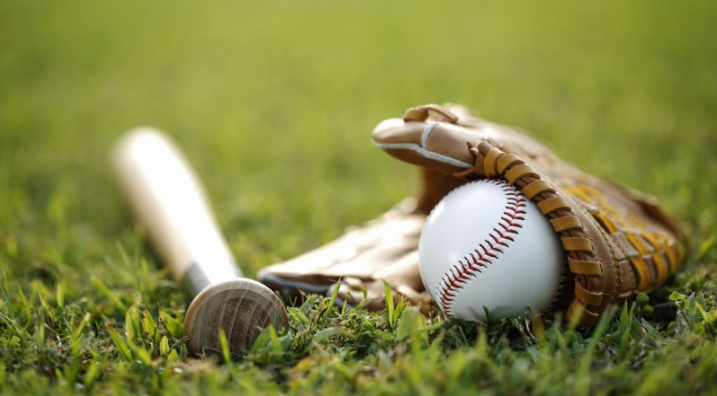

## What is Linear Regression?
---
The aim is to linearly model the relationship between dependent variable (y)  and independent variable(s) (X). If there is one X, this model is called Simple Linear Regression and if there is more than one X, this model is called Multiple Linear Regression. 

**Simple Linear Regression Formula** 

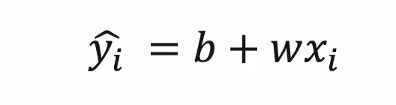

**Multiple Linear Regression Formula**

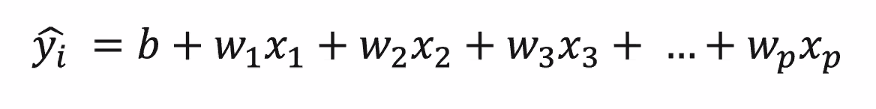

* yi : Dependent variable
* b  : Constant
* w  : Coefficient
* X  : Independent variable

### Success evaluation metrics

* Mean Square Error ( MSE )
* Root Mean Square Error ( RMSE )
* Mean Absolute Error ( MAE )

What we want to do here is to find constant (b) and aches (w) that can make the sum/average of the squares of the differences between the actual values and the predicted values a minimum.

If the dependent variable is numerical, linear regression is used, and if it is categorical, logistic regression is used. Since our dependent variable is numerical in our hitters data set, we will use linear regression.

## Business Problem
---
Hitters dataset contains Salary information and a batch of information about baseball players in 1986. Can a machine learning project be carried out to estimate player's salary?

## Dataset Story
---

This dataset was originally taken from the StatLib library at Carnegie Mellon University. The dataset is part of the data used in the 1988 ASA Graphics Division Poster Session. Salary data are from Sports Illustrated, April 20, 1987.

## Variables
---
* **AtBat**: 1986-1987 the number of times a baseball bat hits the ball 
* **Hits**: 1986-1987 hits 
* **HmRun**: 1986-1987 perfect hits 
* **Runs**: 1986-1987 points won to the team 
* **RBI**: The number of players a batsman walked when he hit 
* **Walks**: Number of mistakes made by the opposing player 
* **Year**: How long the player has played in the major league (years) 
* **CAtBat**: Number of ball hits throughout the player's career 
* **CHits**: Number of hits hit during the player's career 
* **CHmRun**: Number of perfect hits during the player's career 
* **CRuns**: Player scoring points for his team throughout his career 
* **CRBI**: The number of players the player has made to walk during his career 
* **CWalks** : The number of mistakes the player has made to the opposing player during his career 
* **League**: Has a factor that indicates ownership of the player's seasonal levels (A or N) 
* **Division**: A factor with additional contributing indicator E and W levels for 1986 season
* **PutOuts**: Helping your teammate in-game 
* **Assists**: 1986-1987 counts as assists 
* **Errors**: Number of player errors in 1986-1987 
* **Salary**: The player earned money 1986-1987 (thousand) 
* **NewLeague**: A factor showing the league of a player used in 1987 and has A & N levels

## Let's start
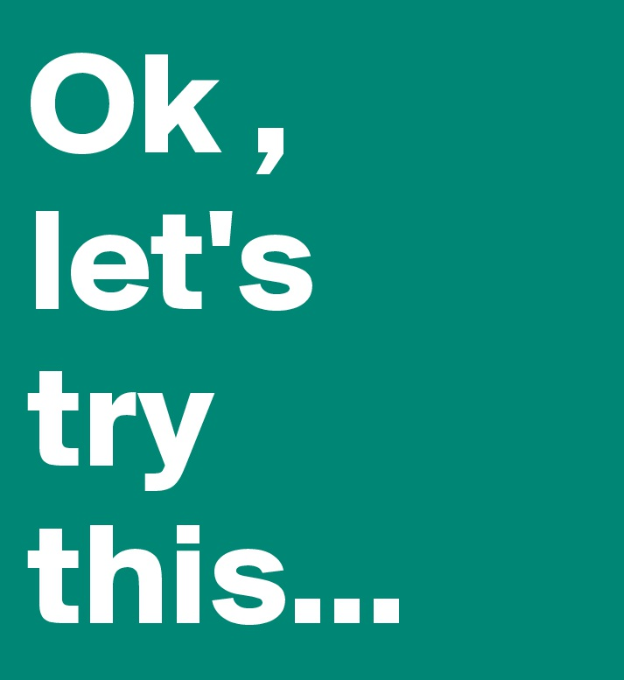

## E.D.A
---

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set_theme()
from matplotlib import pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

### Let's Get the Data Set.

In [2]:
def load_hitters():
    data = pd.read_csv("../input/hitters/Hitters.csv")
    return data

In [3]:
df_ = load_hitters()
df = df_.copy()
# capitalize all variable names
df.columns = [col.upper() for col in df.columns]

### Let's look at dataset details
---

In [4]:
def check_df(dataframe, head=5, tail=5, quan=True):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(tail))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())

    if quan:
        print("##################### Quantiles #####################")
        print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
check_df(df)


##################### Shape #####################
(322, 20)
##################### Types #####################
ATBAT          int64
HITS           int64
HMRUN          int64
RUNS           int64
RBI            int64
WALKS          int64
YEARS          int64
CATBAT         int64
CHITS          int64
CHMRUN         int64
CRUNS          int64
CRBI           int64
CWALKS         int64
LEAGUE        object
DIVISION      object
PUTOUTS        int64
ASSISTS        int64
ERRORS         int64
SALARY       float64
NEWLEAGUE     object
dtype: object
##################### Head #####################
   ATBAT  HITS  HMRUN  RUNS  RBI  WALKS  YEARS  CATBAT  CHITS  CHMRUN  CRUNS  CRBI  CWALKS LEAGUE DIVISION  PUTOUTS  ASSISTS  ERRORS  SALARY NEWLEAGUE
0    293    66      1    30   29     14      1     293     66       1     30    29      14      A        E      446       33      20     NaN         A
1    315    81      7    24   38     39     14    3449    835      69    321   414     375      N        

### Numerical and categorical variables
---

In [5]:
def grab_col_names(dataframe, cat_th=3, car_th=10):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car
cat_cols, num_cols, cat_but_car = grab_col_names(df)


Observations: 322
Variables: 20
cat_cols: 3
num_cols: 17
cat_but_car: 0
num_but_cat: 0


### Numerical variable analysis
---

In [6]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)
for col in num_cols:
    num_summary(df, col, plot=False)


count   322.000
mean    380.929
std     153.405
min      16.000
5%      161.000
10%     194.100
20%     221.800
30%     281.300
40%     321.800
50%     379.500
60%     430.200
70%     490.000
80%     535.600
90%     584.900
95%     609.900
99%     658.590
max     687.000
Name: ATBAT, dtype: float64
count   322.000
mean    101.025
std      46.455
min       1.000
5%       39.000
10%      45.100
20%      57.000
30%      70.000
40%      82.000
50%      96.000
60%     113.000
70%     128.700
80%     144.000
90%     163.000
95%     174.000
99%     210.790
max     238.000
Name: HITS, dtype: float64
count   322.000
mean     10.770
std       8.709
min       0.000
5%        0.000
10%       1.000
20%       3.000
30%       5.000
40%       6.000
50%       8.000
60%      10.600
70%      14.000
80%      18.000
90%      24.000
95%      28.950
99%      33.000
max      40.000
Name: HMRUN, dtype: float64
count   322.000
mean     50.910
std      26.024
min       0.000
5%       17.000
10%      20.100
20%  

### Categorical variable analysis
---

   LEAGUE  Ratio
A     175 54.348
N     147 45.652
##########################################


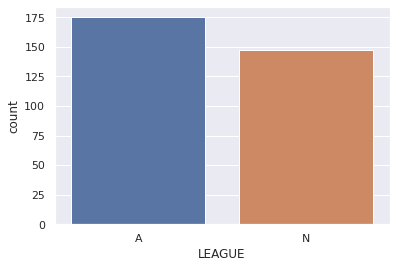

   DIVISION  Ratio
W       165 51.242
E       157 48.758
##########################################


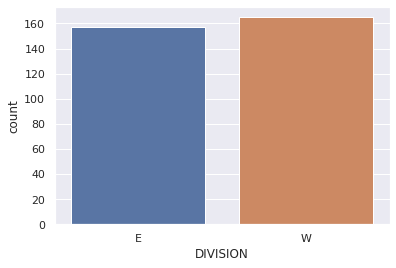

   NEWLEAGUE  Ratio
A        176 54.658
N        146 45.342
##########################################


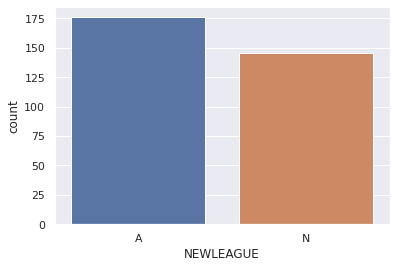

In [7]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()
for col in cat_cols:
    cat_summary(df,col, plot=True)

### Outlier Analysis
---

In [8]:
def outlier_thresholds(dataframe, col_name, q1=0.01, q3=0.99):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False
for col in num_cols:
    print(col, check_outlier(df, col))


ATBAT False
HITS False
HMRUN False
RUNS False
RBI False
WALKS False
YEARS False
CATBAT False
CHITS False
CHMRUN False
CRUNS False
CRBI False
CWALKS False
PUTOUTS False
ASSISTS False
ERRORS False
SALARY False


### Missing values Analysis
---

In [9]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns
missing_values_table(df, na_name=True)


        n_miss  ratio
SALARY      59 18.320


['SALARY']

### Correlation analysis
---

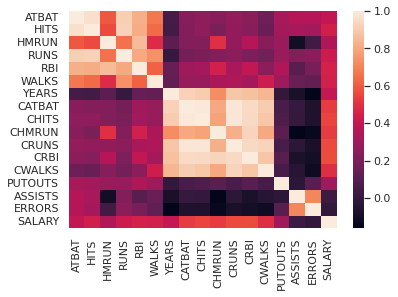

In [10]:
cor = df.corr(method='pearson')
cor
sns.heatmap(cor)
plt.show()


## Feature Engineering
---

Thanks to [M.Akif](https://www.linkedin.com/in/m-akif-biyikli/) for his nice explanations. I benefited from his explanations. [*> Quotation*](https://medium.com/analytics-vidhya/feature-engineering-with-hitters-dataset-1a992daf13fa) 

In [11]:
# New Feature

# CAREER RUNS RATIO
df["NEW_C_RUNS_RATIO"] = df["RUNS"] / df["CRUNS"]
# CAREER BAT RATIO
df["NEW_C_ATBAT_RATIO"] = df["ATBAT"] / df["CATBAT"]
# CAREER HITS RATIO
df["NEW_C_HITS_RATIO"] = df["HITS"] / df["CHITS"]
# CAREER HMRUN RATIO
df["NEW_C_HMRUN_RATIO"] = df["HMRUN"] / df["CHMRUN"]
# CAREER RBI RATIO
df["NEW_C_RBI_RATIO"] = df["RBI"] / df["CRBI"]
# CAREER WALKS RATIO
df["NEW_C_WALKS_RATIO"] = df["WALKS"] / df["CWALKS"]
df["NEW_C_HIT_RATE"] = df["CHITS"] / df["CATBAT"]
# PLAYER TYPE : RUNNER
df["NEW_C_RUNNER"] = df["CRBI"] / df["CHITS"]
# PLAYER TYPE : HIT AND RUN
df["NEW_C_HIT-AND-RUN"] = df["CRUNS"] / df["CHITS"]
# MOST VALUABLE HIT RATIO IN HITS
df["NEW_C_HMHITS_RATIO"] = df["CHMRUN"] / df["CHITS"]
# MOST VALUABLE HIT RATIO IN ALL SHOTS
df["NEW_C_HMATBAT_RATIO"] = df["CATBAT"] / df["CHMRUN"]

#Annual Averages
df["NEW_CATBAT_MEAN"] = df["CATBAT"] / df["YEARS"]
df["NEW_CHITS_MEAN"] = df["CHITS"] / df["YEARS"]
df["NEW_CHMRUN_MEAN"] = df["CHMRUN"] / df["YEARS"]
df["NEW_CRUNS_MEAN"] = df["CRUNS"] / df["YEARS"]
df["NEW_CRBI_MEAN"] = df["CRBI"] / df["YEARS"]
df["NEW_CWALKS_MEAN"] = df["CWALKS"] / df["YEARS"]

# PLAYER LEVEL
df.loc[(df["YEARS"] <= 2), "NEW_YEARS_LEVEL"] = "Junior"
df.loc[(df["YEARS"] > 2) & (df['YEARS'] <= 5), "NEW_YEARS_LEVEL"] = "Mid"
df.loc[(df["YEARS"] > 5) & (df['YEARS'] <= 10), "NEW_YEARS_LEVEL"] = "Senior"
df.loc[(df["YEARS"] > 10), "NEW_YEARS_LEVEL"] = "Expert"

# PLAYER LEVEL X DIVISION

df.loc[ (df["NEW_YEARS_LEVEL"] == "Junior") & (df["DIVISION"] == "E"), 'NEW_DIV_CAT'] = "Junior-East"
df.loc[(df["NEW_YEARS_LEVEL"] == "Junior") & (df["DIVISION"] == "W"), 'NEW_DIV_CAT'] = "Junior-West"
df.loc[(df["NEW_YEARS_LEVEL"] == "Mid") & (df["DIVISION"] == "E"), 'NEW_DIV_CAT'] = "Mid-East"
df.loc[(df["NEW_YEARS_LEVEL"] == "Mid") & (df["DIVISION"] == "W"), 'NEW_DIV_CAT'] = "Mid-West"
df.loc[(df["NEW_YEARS_LEVEL"] == "Senior") & (df["DIVISION"] == "E"), 'NEW_DIV_CAT'] = "Senior-East"
df.loc[(df["NEW_YEARS_LEVEL"] == "Senior") & (df["DIVISION"] == "W"), 'NEW_DIV_CAT'] = "Senior-West"
df.loc[(df["NEW_YEARS_LEVEL"] == "Expert") & (df["DIVISION"] == "E"), 'NEW_DIV_CAT'] = "Expert-East"
df.loc[(df["NEW_YEARS_LEVEL"] == "Expert") & (df["DIVISION"] == "W"), 'NEW_DIV_CAT'] = "Expert-West"

# Player Promotion to Next League
df.loc[(df["LEAGUE"] == "N") & (df["NEWLEAGUE"] == "N"), "NEW_PLAYER_PROGRESS"] = "StandN"
df.loc[(df["LEAGUE"] == "A") & (df["NEWLEAGUE"] == "A"), "NEW_PLAYER_PROGRESS"] = "StandA"
df.loc[(df["LEAGUE"] == "N") & (df["NEWLEAGUE"] == "A"), "NEW_PLAYER_PROGRESS"] = "Descend"
df.loc[(df["LEAGUE"] == "A") & (df["NEWLEAGUE"] == "N"), "NEW_PLAYER_PROGRESS"] = "Ascend"

# PLayer Ratio in year
df["NEW_ASSISTS_RATIO"] = df["ASSISTS"] / df["ATBAT"]
df["NEW_HITS_RECALL"] = df["HITS"] / (df["HITS"] + df["ERRORS"])
df["NEW_NET_HELPFUL_ERROR"] = (df["WALKS"] - df["ERRORS"]) / df["WALKS"]
df["NEW_TOTAL_SCORE"] = (df["RBI"] + df["ASSISTS"] + df["WALKS"] - df["ERRORS"]) / df["ATBAT"]
df["NEW_HIT_RATE"] = df["HITS"] / df["ATBAT"]
df["NEW_TOUCHER"] = df["ASSISTS"] / df["PUTOUTS"]
df["NEW_RUNNER"] = df["RBI"] / df["HITS"]
df["NEW_HIT-AND-RUN"] = df["RUNS"] / (df["HITS"])
df["NEW_HMHITS_RATIO"] = df["HMRUN"] / df["HITS"]
df["NEW_HMATBAT_RATIO"] = df["ATBAT"] / df["HMRUN"]
df["NEW_TOTAL_CHANCES"] = df["ERRORS"] + df["PUTOUTS"] +df["ASSISTS"]

In [12]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 322
Variables: 51
cat_cols: 6
num_cols: 45
cat_but_car: 0
num_but_cat: 0


### Actions required for missing and outlier values
---

In [13]:
# let's see missing values
missing_values_table(df)
##### infinity values occur as a result of new variables let's assign them as nan 
df.replace([np.inf, -np.inf], np.nan, inplace=True)
missing_values_table(df)
from sklearn.impute import KNNImputer
# We do one hot encoding because it is necessary to be able to do a predictive filling process.
dff = pd.get_dummies(df[cat_cols + num_cols], drop_first=True)
scaler = MinMaxScaler()
dff = pd.DataFrame(scaler.fit_transform(dff), columns=dff.columns)
# applying KNN.
imputer = KNNImputer(n_neighbors=33)
dff = pd.DataFrame(imputer.fit_transform(dff), columns=dff.columns)
dff = pd.DataFrame(scaler.inverse_transform(dff), columns=dff.columns)
# let's see the assignments in main df according to the forecast
df["SALARY"] = dff[["SALARY"]]
df["NEW_HMATBAT_RATIO"] = dff[["NEW_HMATBAT_RATIO"]]
df["NEW_TOUCHER"] = dff[["NEW_TOUCHER"]]
df["NEW_C_HMRUN_RATIO"] = dff[["NEW_C_HMRUN_RATIO"]]
df["NEW_C_HMATBAT_RATIO"] = dff[["NEW_C_HMATBAT_RATIO"]]
df["NEW_NET_HELPFUL_ERROR"] = dff[["NEW_NET_HELPFUL_ERROR"]]
df["NEW_C_RBI_RATIO"] = dff[["NEW_C_RBI_RATIO"]]
df["NEW_C_WALKS_RATIO"] = dff[["NEW_C_WALKS_RATIO"]]

                   n_miss  ratio
SALARY                 59 18.320
NEW_TOUCHER            15  4.660
NEW_C_HMRUN_RATIO       7  2.170
NEW_C_RBI_RATIO         1  0.310
NEW_C_WALKS_RATIO       1  0.310
                       n_miss  ratio
SALARY                     59 18.320
NEW_HMATBAT_RATIO          18  5.590
NEW_TOUCHER                15  4.660
NEW_C_HMRUN_RATIO           7  2.170
NEW_C_HMATBAT_RATIO         7  2.170
NEW_NET_HELPFUL_ERROR       2  0.620
NEW_C_RBI_RATIO             1  0.310
NEW_C_WALKS_RATIO           1  0.310


### Finding and deleting outliers based on the principle of neighborliness
---

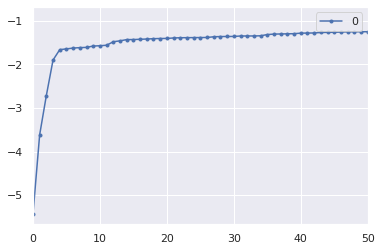

In [14]:
clf = LocalOutlierFactor(n_neighbors=5)
clf.fit_predict(df[num_cols])
df_scores = clf.negative_outlier_factor_
df_scores[0:30]
np.sort(df_scores)[0:30]

scores = pd.DataFrame(np.sort(df_scores))
scores.plot(stacked=True, xlim=[0, 50], style='.-')
plt.show()

th = np.sort(df_scores)[5]
df[df_scores < th]
df[df_scores < th].shape
df.describe([0.01, 0.05, 0.75, 0.90, 0.99]).T
clf_index = df[df_scores < th].index
df.drop(index=clf_index, inplace=True)

### Encoding 
---

In [15]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)
# One Hot encoding
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

df = one_hot_encoder(df, cat_cols)

Observations: 317
Variables: 51
cat_cols: 6
num_cols: 45
cat_but_car: 0
num_but_cat: 0


### Model
---

In [16]:
X = df.drop('SALARY', axis=1)
y = df[["SALARY"]]
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20, random_state=1)

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
# (b - bias)
reg_model.intercept_
# coefficients (w - weights)
reg_model.coef_

array([[ 2.87228384e-02,  2.00560816e+00,  2.07246806e+01,
         1.71822622e+00, -7.65881674e+00,  3.63222639e-02,
        -3.80340804e+01, -1.75921628e-01,  9.40879367e-01,
         7.90342488e-01, -2.41302544e-01, -1.76010293e-01,
         1.05644675e-01, -1.03583958e+00, -1.43223492e+00,
         3.64897341e+00, -2.01937312e+01, -1.29249116e+03,
         3.54782451e+02, -9.61663050e+01,  2.24708625e+02,
         2.46520427e+02,  1.48226138e+02, -5.49708216e+02,
        -5.41875291e+02,  6.28656802e+02,  7.27928671e-02,
        -4.59857747e+00,  4.46696184e+00, -1.99544675e+01,
         1.27107571e+01,  1.77659122e+01,  7.62522845e-01,
        -4.80599880e+02,  4.35833367e+02, -4.65958838e+01,
         5.84478225e+02, -2.97147847e+03,  9.85118315e+00,
         8.50542875e+01, -2.51065135e+02, -1.34889796e+03,
         6.86876166e-02,  1.18089890e+00, -5.06963739e+01,
        -5.45897430e+01,  5.43371125e+01, -1.04644123e+02,
        -1.32827228e+02,  2.58114758e+01,  1.21433306e+0

## Evaluating Forecast Success
---

In [17]:
# Train RMSE
y_pred = reg_model.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))
# TRAIN R^2
reg_model.score(X_train, y_train)

0.7540519103987569

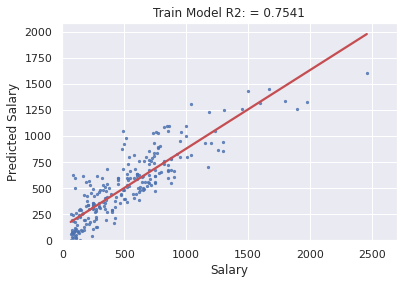

In [18]:
# Train part regplot:
g = sns.regplot(x=y_train, y=y_pred, scatter_kws={'color': 'b', 's': 5},
                ci=False, color="r")
g.set_title(f"Train Model R2: = {reg_model.score(X_train, y_train):.4f}")
g.set_ylabel("Predicted Salary")
g.set_xlabel("Salary")
plt.xlim(-5, 2700)
plt.ylim(bottom=0)
plt.show()

In [19]:
# Test RMSE
y_pred = reg_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))
# Test R^2
reg_model.score(X_test, y_test)

0.537925251330175

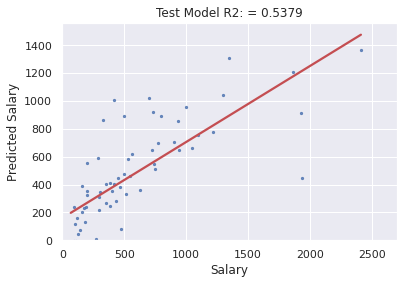

In [20]:
# Test part regplot:
g = sns.regplot(x=y_test, y=y_pred, scatter_kws={'color': 'b', 's': 5},
                ci=False, color="r")
g.set_title(f"Test Model R2: = {reg_model.score(X_test, y_test):.4f}")
g.set_ylabel("Predicted Salary")
g.set_xlabel("Salary")
plt.xlim(-5, 2700)
plt.ylim(bottom=0)
plt.show()

In [21]:
# K-FOLD CV RMSE
np.mean(np.sqrt(-cross_val_score(reg_model, X, y, cv=10, scoring="neg_mean_squared_error")))

269.3304547411752

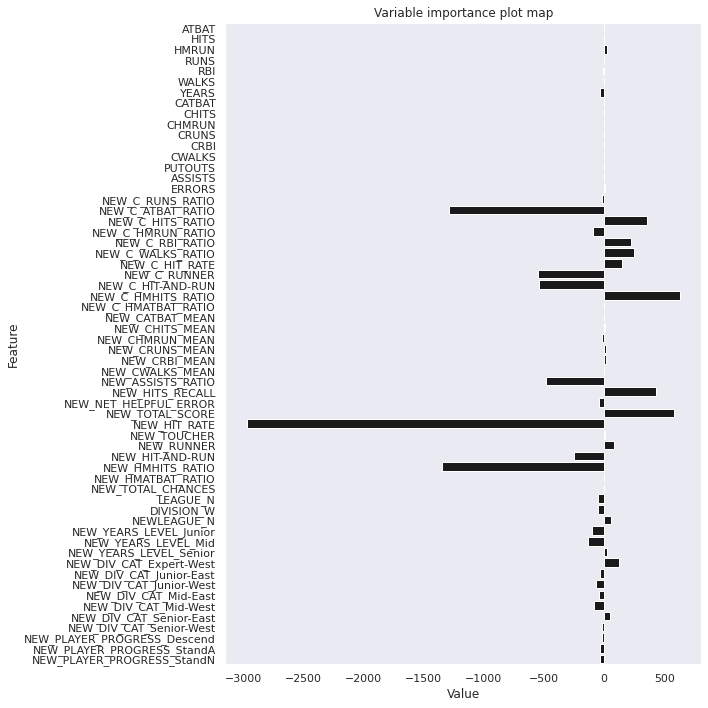

In [22]:
def plot_importance(save=False):
    feature_imp = pd.DataFrame({"Value": reg_model.coef_[0], "Feature": X.columns})
    plt.figure(figsize=(10,10))
    sns.barplot(x="Value", y="Feature", data=feature_imp, color="k")
    plt.title("Variable importance plot map")
    plt.grid(axis="x")
    plt.tight_layout()
    if save:
        plt.savefig("pic_imp.png")
    plt.show()

plot_importance()


___

**Thank you to those who contributed to this work.** [VBO](https://www.veribilimiokulu.com/), [Miuul](https://www.miuul.com/), [Vahit Keskin](https://www.linkedin.com/in/vahitkeskin/), [Oğuz Erdoğan](https://www.linkedin.com/in/oguzerdo/),[Mehmet Tuzcu](https://www.linkedin.com/in/mehmettuzcu/), [Hande Küçükbulut](https://www.linkedin.com/in/hande-kucukbulut/) & [Burak Doğrul](https://www.linkedin.com/in/burakdogrul/).